# SPACY APPROACH FOR NLP CHATBOT

- python -m spacy download en_core_web_sm
  
    This will download the english nlp pipeline package
    It contains:
    - tok2vec
    - tagger
    - parser
    - senter
    - attribute_ruler
    - lemmatizer
    - ner (Name Entity Recognition)
        
More Info: https://spacy.io/models/en#en_core_web_sm

In [ ]:
# Install Dependencies
# pip install spacy
# python -m spacy download en_core_web_sm

In [26]:
import spacy

source_nlp = spacy.load("en_core_web_sm")
source_nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [27]:
source_nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x17e5192cdc0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x17e51928ee0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x17e520aad60>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x17e53d1c140>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x17e53d1f900>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x17e520aaac0>)]

In [28]:
# If i want to create a new pipeline
nlp = spacy.blank("en")
nlp.pipe_names

# I can use components from other pipelines
nlp.add_pipe("tok2vec", source=source_nlp)
nlp.add_pipe("senter", source=source_nlp)
nlp.pipe_names

['tok2vec', 'senter']

In [39]:
doc = source_nlp("Who is the University President of TUP?")

for token in doc:
    print(token, " | ", token.pos_, " | ", token.lemma_)

Who  |  PRON  |  who
is  |  AUX  |  be
the  |  DET  |  the
University  |  PROPN  |  University
President  |  PROPN  |  President
of  |  ADP  |  of
TUP  |  PROPN  |  TUP
?  |  PUNCT  |  ?


In [30]:
from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [40]:
for token in doc:
    if not token.is_stop:
        print(token)

University
President
TUP
?


## Using Pandas

In [87]:
import pandas as pd

df = pd.read_json("intents.json", encoding="utf-8")
df.shape

(127, 1)

In [88]:
df.head(5)

,intents
0,"{'tag': 'goodbye', 'patterns': ['Goodbye', 'By..."
1,"{'tag': 'developers', 'patterns': ['what is th..."
2,"{'tag': 'name', 'patterns': ['name', 'your nam..."
3,"{'tag': 'salutation', 'patterns': ['okk', 'oki..."
4,"{'tag': 'greeting', 'patterns': ['Hi', 'Hi Hi ..."


In [89]:
tags = [intent["tag"] for intent in df["intents"]]
tags

patterns = [intent["patterns"] for intent in df["intents"]]
patterns

responses = [intent["responses"] for intent in df["intents"]]
responses

[['See you later, thanks for visiting',
  'Goodbye! If you have any more questions, feel free to ask.'],
 ["I am happy to introduce the creators of this project 'The implementation of a Virtual Assistant for the Academic Management of Students of TUP-Manila with the use of Naive Bayes Algorithm':\n\t+Mary Jane Calulang\thttps://github.com/meri-hane\n\t+Jeanne May Carolino\thttps://github.com/jeannmaycarolino\n\t+Maria Evita Juan\thttps://github.com/evyjuan\n\t+John Paul Monter\thttps://github.com/D3struf\n\t+Vincent Johanne Tenorio\thttps://github.com/Yuhan-BSCS"],
 ["I'm your trusty virtual assistant here to help you with anything you need about Technological University of the Philippines (TUP)!",
  "My name's LRT GANG, and I'm here to answer your curiosity about Technological University of the Philippines (TUP)!"],
 ['I am glad I could help!',
  "You're welcome! Is there anything else I can assist you with?"],
 ['Hello! How can I assist you?',
  'Hi there! How can I help you today?',

In [90]:
data = {
    'tags': tags,
    'patterns': patterns,
    'responses': responses
}

intents = pd.DataFrame(data)
intents.head(5)

,tags,patterns,responses
0,goodbye,"[Goodbye, Bye, See you later, Take care, Until...","[See you later, thanks for visiting, Goodbye! ..."
1,developers,"[what is the name of your developers, what is ...",[I am happy to introduce the creators of this ...
2,name,"[name, your name, do you have a name, what are...",[I'm your trusty virtual assistant here to hel...
3,salutation,"[okk, okie, nice work, well done, good job, th...","[I am glad I could help!, You're welcome! Is t..."
4,greeting,"[Hi, Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi , How are y...","[Hello! How can I assist you?, Hi there! How c..."


In [91]:
intents.describe()

,tags,patterns,responses
count,127,127,127
unique,127,127,127
top,goodbye,"[Goodbye, Bye, See you later, Take care, Until...","[See you later, thanks for visiting, Goodbye! ..."
freq,1,1,1


In [93]:
for index in intents['patterns']:
    for text in index:
        print(text)

Goodbye
Bye
See you later
Take care
Until next time
So long
Farewell
Adios
Catch you later
Have a great day
Bye for now
See you soon
Until we meet again
Goodnight
Take it easy
Peace out
Later gator
Keep in touch
Have a good one
Signing off
what is the name of your developers
what is the name of your creators
what is the name of the developers
what is the name of the creators
who created you
your developers
your creators
who are your developers
developers
you are made by
you are made by whom
who created you
who create you
creators
who made you
Who created you?
Who developed you?
Who is your creator?
Who made you?
Who are you?
Who are your developers?
Who built you?
Who programmed you?
Who is responsible for your creation?
Who designed you?
Who are the minds behind you?
name
your name
do you have a name
what are you called
what is your name
what should I call you
whats your name?
what are you
who are you
who is this
what am i chatting to
who am i taking to
what are you
who are you?
what 

In [94]:
def preprocess(text):
    no_stop_words = []
    list_text = []
    for index in intents['patterns']:
        for text in index:
            doc = nlp(text)
            list_text.append([token.text for token in doc if not token.is_stop and not token.is_punct])
        no_stop_words.append(list_text)
    return no_stop_words

In [95]:
intents["bag_of_words"] = intents["patterns"].apply(preprocess)
intents.head(5)

KeyboardInterrupt: 

## Bag of N-grams

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range=(1,1) - only a word at a time
# ngram_range=(1,2) - word per word and two words at a time
# ngram_range=(2,2) - only 2 words at a time
# ngram_range=(1,3) - word per word, two words, and three words at a time

v = CountVectorizer(ngram_range=(1,2))
v.fit(['Who is the University President of TUP?'])
v.vocabulary_

{'who': 11,
 'is': 0,
 'the': 6,
 'university': 9,
 'president': 4,
 'of': 2,
 'tup': 8,
 'who is': 12,
 'is the': 1,
 'the university': 7,
 'university president': 10,
 'president of': 5,
 'of tup': 3}

In [98]:
corpus = [              
            "Who is the University President of TUP?",
            "What is the email address of the VP for Academic Affairs at TUP?",
            "Who holds the position of VP for Research & Extension at TUP?",
            "How can I contact the VP for Administration & Finance at TUP?",
            "Who is responsible for Planning, Development & Special Concerns at TUP?",
            "Can you provide the contact information for the Office of the President at TUP?",
            "Who is the VP for Academic Affairs, and what are their responsibilities?",
            "What is the email address of the VP for Planning, Development & Special Concerns at TUP?",
            "How can I reach the top management of TUP for administrative matters?",
            "Who is the VP for Research & Extension, and how can I contact them?"
        ]

In [100]:
import spacy 

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

preprocess_text("Who is the University President of TUP?")

'University President TUP'

In [101]:
corpus_process = [preprocess_text(text) for text in corpus]
corpus_process

['University President TUP',
 'email address VP Academic Affairs TUP',
 'hold position VP Research Extension TUP',
 'contact VP Administration Finance TUP',
 'responsible Planning Development Special Concerns TUP',
 'provide contact information Office President TUP',
 'vp Academic Affairs responsibility',
 'email address VP Planning Development Special Concerns TUP',
 'reach management TUP administrative matter',
 'VP Research Extension contact']

In [102]:
X = CountVectorizer(ngram_range=(1,2))
X.fit(corpus_process)
X.vocabulary_

{'university': 53,
 'president': 38,
 'tup': 51,
 'university president': 54,
 'president tup': 39,
 'email': 18,
 'address': 2,
 'vp': 55,
 'academic': 0,
 'affairs': 8,
 'email address': 19,
 'address vp': 3,
 'vp academic': 56,
 'academic affairs': 1,
 'affairs tup': 10,
 'hold': 25,
 'position': 36,
 'research': 44,
 'extension': 20,
 'hold position': 26,
 'position vp': 37,
 'vp research': 59,
 'research extension': 45,
 'extension tup': 22,
 'contact': 13,
 'administration': 4,
 'finance': 23,
 'contact vp': 15,
 'vp administration': 57,
 'administration finance': 5,
 'finance tup': 24,
 'responsible': 47,
 'planning': 34,
 'development': 16,
 'special': 49,
 'concerns': 11,
 'responsible planning': 48,
 'planning development': 35,
 'development special': 17,
 'special concerns': 50,
 'concerns tup': 12,
 'provide': 40,
 'information': 27,
 'office': 32,
 'provide contact': 41,
 'contact information': 14,
 'information office': 28,
 'office president': 33,
 'responsibility': 46,


In [104]:
X.transform(["Who is the University President of TUP?"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]], dtype=int64)

## Try Whole Intent (SE - with Training)

Intents.json contains 128 intents about TUP. I will use n-grams and Naive Bayes for training 

In [1]:
import pandas as pd

df = pd.read_json("intents.json", encoding="utf-8")
print(df.shape)
df.head()

(126, 1)


,intents
0,"{'tag': 'goodbye', 'patterns': ['Goodbye', 'By..."
1,"{'tag': 'developers', 'patterns': ['what is th..."
2,"{'tag': 'name', 'patterns': ['name', 'your nam..."
3,"{'tag': 'salutation', 'patterns': ['okk', 'oki..."
4,"{'tag': 'greeting', 'patterns': ['Hi', 'Hi Hi ..."


In [2]:
# Convert to a proper DataFrame
tags = [intent["tag"] for intent in df["intents"]]
patterns = [intent["patterns"] for intent in df["intents"]]
responses = [intent["responses"] for intent in df["intents"]]

data = {
    'tags': tags,
    'patterns': patterns
}

intents = pd.DataFrame(data)
intents

,tags,patterns
0,goodbye,"[Goodbye, Bye, See you later, Take care, Until..."
1,developers,"[what is the name of your developers, what is ..."
2,name,"[name, your name, do you have a name, what are..."
3,salutation,"[okk, okie, nice work, well done, good job, th..."
4,greeting,"[Hi, Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi , How are y..."
...,...,...
121,assessmentoffees_link,[Where can I find information about the assess...
122,studentprivileges_link,[Where can I find information about student pr...
123,studentscholarship_link,[Can you provide information about student sch...
124,applicationscholarship_link,[How do I apply for a scholarship at TUP Manil...


In [3]:
df_exploded = intents.explode('patterns')
df_exploded

,tags,patterns
0,goodbye,Goodbye
0,goodbye,Bye
0,goodbye,See you later
0,goodbye,Take care
0,goodbye,Until next time
...,...,...
125,osa_link,Can you tell me about the functions of The Off...
125,osa_link,What programs are available for student develo...
125,osa_link,How can I contact The Office of Student Affair...
125,osa_link,Is there a list of services provided by The Of...


In [4]:
df_exploded.reset_index(drop=True, inplace=True)
df_exploded

,tags,patterns
0,goodbye,Goodbye
1,goodbye,Bye
2,goodbye,See you later
3,goodbye,Take care
4,goodbye,Until next time
...,...,...
1876,osa_link,Can you tell me about the functions of The Off...
1877,osa_link,What programs are available for student develo...
1878,osa_link,How can I contact The Office of Student Affair...
1879,osa_link,Is there a list of services provided by The Of...


In [5]:
# Counts of patterns each tag
df_exploded['tags'].value_counts()

tags
officials_academic_affairs                                        61
name                                                              32
admission_undergraduate_procedure                                 32
admission_admission/enrollmentprocedure_enrollment_scholars       30
admission_admission/enrollmentprocedure_enrollment_oldstudents    27
                                                                  ..
officials_research_extensions                                      6
tup_hymn                                                           5
tup_core_values                                                    5
tup_mission                                                        5
tup_vision                                                         5
Name: count, Length: 126, dtype: int64

In [6]:
# Convert the strings into a numerical tag
df_exploded['tag_numerical'] = pd.factorize(df_exploded['tags'])[0]
df_exploded

,tags,patterns,tag_numerical
0,goodbye,Goodbye,0
1,goodbye,Bye,0
2,goodbye,See you later,0
3,goodbye,Take care,0
4,goodbye,Until next time,0
...,...,...,...
1876,osa_link,Can you tell me about the functions of The Off...,125
1877,osa_link,What programs are available for student develo...,125
1878,osa_link,How can I contact The Office of Student Affair...,125
1879,osa_link,Is there a list of services provided by The Of...,125


### Will train the intents without TEXT PROCESSING

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_exploded['patterns'], 
    df_exploded['tag_numerical'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_exploded['tag_numerical']
)

In [77]:
print(X_train.shape)
X_train.head()

(1504,)


1228    I'm interested in CAFA student organizations. ...
1515    Who are the instructors teaching in the Entrep...
220             I want to know more about the facilities.
474     What documents are required for evaluation by ...
1465    What are the names of the faculty members in t...
Name: patterns, dtype: object

In [78]:
y_train.value_counts()

tag_numerical
23    49
28    25
2     25
33    24
31    22
      ..
25     5
15     4
19     4
16     4
14     4
Name: count, Length: 126, dtype: int64

In [79]:
y_test.value_counts()

tag_numerical
23    12
2      7
28     7
33     6
31     5
      ..
16     1
25     1
15     1
19     1
14     1
Name: count, Length: 126, dtype: int64

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),  # Convert text to Bag-of-Words features
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

# #2 Fit the X_train and y_train
# classifier.fit(X_train, y_train)

# #3 get the predictions for X_test and store it in y_pred
# y_pred = classifier.predict(X_test)

# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.80      0.80      0.80         5
           2       0.86      0.86      0.86         7
           3       0.00      0.00      0.00         3
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         2
           6       1.00      0.60      0.75         5
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.67      0.50      0.57         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       1.00      0.67      0.80         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),  # Convert text to 2 Bag-of-Words
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

#2 Fit the X_train and y_train
classifier.fit(X_train, y_train)

#3 get the predictions for X_test and store it in y_pred
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.75      0.60      0.67         5
           2       0.67      0.86      0.75         7
           3       0.00      0.00      0.00         3
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         2
           6       1.00      0.60      0.75         5
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.75      0.75      0.75         4
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         3
          13       1.00      0.67      0.80         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),  # Convert text to 3 Bag-of-Words
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

#2 Fit the X_train and y_train
classifier.fit(X_train, y_train)

#3 get the predictions for X_test and store it in y_pred
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.60      0.67         5
           2       0.67      0.86      0.75         7
           3       0.00      0.00      0.00         3
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         2
           6       1.00      0.60      0.75         5
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.75      0.75      0.75         4
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         3
          13       0.67      0.67      0.67         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Will use Text - processing procedure (remove stop words and punctuation, lemmatization)

In [60]:
import spacy 

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [61]:
# Preprocess the strings in pattern
df_exploded['processed_patterns'] = df_exploded['patterns'].apply(preprocess_text)
df_exploded

,tags,patterns,tag_numerical,processed_patterns
0,goodbye,Goodbye,0,goodbye
1,goodbye,Bye,0,Bye
2,goodbye,See you later,0,later
3,goodbye,Take care,0,care
4,goodbye,Until next time,0,time
...,...,...,...,...
1876,osa_link,Can you tell me about the functions of The Off...,125,tell function Office Student Affairs OSA TUP M...
1877,osa_link,What programs are available for student develo...,125,program available student development TUP Manila
1878,osa_link,How can I contact The Office of Student Affair...,125,contact Office Student Affairs OSA TUP Manila
1879,osa_link,Is there a list of services provided by The Of...,125,list service provide Office Student Affairs OS...


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    df_exploded['processed_patterns'], 
    df_exploded['tag_numerical'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_exploded['tag_numerical']
)

In [63]:
print(X_train.shape)
X_train.head()

(1504,)


1228          interested CAFA student organization option
1515         instructor teach Entrepreneurship Department
220                                    want know facility
474     document require evaluation respective college...
1465            name faculty member Electrical Department
Name: processed_patterns, dtype: object

In [64]:
y_train.value_counts()

tag_numerical
23    49
28    25
2     25
33    24
31    22
      ..
25     5
15     4
19     4
16     4
14     4
Name: count, Length: 126, dtype: int64

In [67]:
y_test.value_counts()

tag_numerical
23    12
2      7
28     7
33     6
31     5
      ..
16     1
25     1
15     1
19     1
14     1
Name: count, Length: 126, dtype: int64

In [68]:
#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),  # Convert text to 1 Bag-of-Words
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

#2 Fit the X_train and y_train
classifier.fit(X_train, y_train)

#3 get the predictions for X_test and store it in y_pred
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.60      0.67         5
           2       0.50      0.14      0.22         7
           3       1.00      0.33      0.50         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      0.50      0.67         2
           9       1.00      0.25      0.40         4
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.60      1.00      0.75         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),  # Convert text to Bag-of-Words features
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

#2 Fit the X_train and y_train
classifier.fit(X_train, y_train)

#3 get the predictions for X_test and store it in y_pred
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.60      0.67         5
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      0.50      0.67         2
           9       1.00      0.25      0.40         4
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.50      1.00      0.67         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),  # Convert text to Bag-of-Words features
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

#2 Fit the X_train and y_train
classifier.fit(X_train, y_train)

#3 get the predictions for X_test and store it in y_pred
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.60      0.67         5
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      0.50      0.67         2
           9       1.00      0.25      0.40         4
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.60      1.00      0.75         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train without splitting the intents

In [171]:
def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [172]:
# Preprocess the strings in pattern
df_exploded['processed_patterns'] = df_exploded['patterns'].apply(preprocess_text)
df_exploded

,tags,patterns,tag_numerical,processed_patterns
0,goodbye,Goodbye,0,goodbye
1,goodbye,Bye,0,Bye
2,goodbye,See you later,0,later
3,goodbye,Take care,0,care
4,goodbye,Until next time,0,time
...,...,...,...,...
1876,osa_link,Can you tell me about the functions of The Off...,125,tell function Office Student Affairs OSA TUP M...
1877,osa_link,What programs are available for student develo...,125,program available student development TUP Manila
1878,osa_link,How can I contact The Office of Student Affair...,125,contact Office Student Affairs OSA TUP Manila
1879,osa_link,Is there a list of services provided by The Of...,125,list service provide Office Student Affairs OS...


In [7]:
# X_train = []
# y_train = []

# X_train.append(tags for tags in df_exploded['patterns'])
# y_train.append(pattern for pattern in df_exploded['tag_numerical'])
X_train = df_exploded['patterns'].values.astype(str)
y_train = df_exploded['tag_numerical'].values.astype(str)
# print(type(X_train))
# X_train

In [8]:
print('X Train: ', X_train)
print(type(X_train))
print('Y Train: ', y_train)
print(type(y_train))

X Train:  ['Goodbye' 'Bye' 'See you later' ...
 'How can I contact The Office of Student Affairs (OSA) at TUP Manila?'
 'Is there a list of services provided by The Office of Student Affairs (OSA) at TUP Manila?'
 'Where can I find The Office of Student Affairs (OSA) at TUP Manila on campus?']
<class 'numpy.ndarray'>
Y Train:  ['0' '0' '0' ... '125' '125' '125']
<class 'numpy.ndarray'>


In [11]:
test = df_exploded['patterns'].sample(126, random_state=2022)

X_test = test.values.astype(str)
y_test = df_exploded.loc[test.index, 'tag_numerical'].values.astype(str)
test

39                                           Who are you?
592     How can I reach the Graduate Program office at...
723      Which programs in TUP are designed for masteral?
1258    What are the names of some undergraduate organ...
1777                  How do I apply for a university ID?
                              ...                        
584     What are the enrollment procedure for charity ...
146                                    where is cafetaria
1864    Where can I find the checklist of requirements...
257                  What is TUP's vision for its future?
1278    Can you give details about CIT's undergraduate...
Name: patterns, Length: 126, dtype: object

In [12]:
print(type(X_test))
X_test

<class 'numpy.ndarray'>


array(['Who are you?',
       'How can I reach the Graduate Program office at TUP via telephone?',
       'Which programs in TUP are designed for masteral?',
       'What are the names of some undergraduate organizations in the College of Liberal Arts?',
       'How do I apply for a university ID?',
       'Can you provide the contact details for admission queries for the College of Liberal Arts?',
       'Where can I find information about The Office of Student Affairs at TUP Manila?',
       'What are the necessary requirements for admission to the TUP Undergraduate Program?',
       'who are your developers',
       'I want to learn about the faculty members teaching Professional Industrial Education.',
       'What is the email address for admissions?', 'address of college',
       'What are the necessary requirements for Freshmen Enrollment?',
       'What are the names of the faculty members in Student Teaching?',
       "Share some key milestones in TUP's history.",
       'How 

In [13]:
print(type(y_test))
y_test

<class 'numpy.ndarray'>


array(['1', '34', '42', '84', '119', '53', '125', '28', '1', '87', '62',
       '9', '30', '88', '12', '16', '67', '116', '29', '116', '76', '13',
       '3', '95', '96', '102', '28', '63', '24', '67', '23', '72', '11',
       '95', '113', '118', '74', '11', '122', '69', '118', '28', '79',
       '80', '69', '122', '107', '107', '92', '19', '102', '82', '77',
       '113', '40', '96', '114', '80', '74', '106', '29', '115', '23',
       '8', '53', '82', '12', '71', '59', '62', '32', '59', '81', '121',
       '66', '44', '25', '21', '7', '42', '110', '6', '2', '23', '103',
       '92', '103', '92', '23', '27', '27', '85', '29', '1', '99', '38',
       '23', '38', '47', '77', '84', '102', '55', '12', '7', '44', '93',
       '76', '91', '24', '5', '116', '52', '2', '86', '56', '23', '0',
       '79', '77', '125', '33', '7', '124', '14', '85'], dtype='<U21')

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
#1 Create a Pipeline Object
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),  # Convert text to Bag-of-Words features
    ('Multi NB', MultinomialNB()),    # Naive Bayes classifier
])

#2 Fit the X_train and y_train
classifier.fit(X_train, y_train)

#3 get the predictions for X_test and store it in y_pred
y_pred = classifier.predict(X_test)
# y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
         102       1.00      1.00      1.00         3
         103       1.00      1.00      1.00         2
         106       1.00      1.00      1.00         1
         107       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
         110       1.00      1.00      1.00         1
         113       1.00      0.50      0.67         2
         114       1.00      1.00      1.00         1
         115       1.00      1.00      1.00         1
         116       1.00      1.00      1.00         3
         118       1.00      1.00      1.00         2
         119       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
         121       1.00      1.00      1.00         1
         122       1.00      1.00      1.00         2
         124       1.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
y_pred = classifier.predict(X_test)
y_pred

array(['1', '34', '42', '84', '119', '53', '125', '28', '1', '87', '23',
       '23', '30', '88', '12', '16', '23', '116', '29', '116', '76', '13',
       '3', '95', '96', '102', '28', '23', '23', '67', '23', '72', '42',
       '95', '113', '118', '74', '125', '122', '69', '118', '28', '79',
       '80', '69', '122', '107', '107', '92', '42', '102', '81', '77',
       '125', '40', '96', '114', '80', '74', '106', '29', '115', '23',
       '8', '23', '82', '12', '71', '59', '34', '31', '59', '81', '121',
       '66', '44', '23', '23', '7', '42', '110', '6', '2', '23', '103',
       '92', '103', '92', '23', '28', '27', '85', '29', '1', '99', '38',
       '23', '38', '47', '78', '84', '102', '55', '23', '7', '44', '93',
       '76', '91', '23', '2', '116', '23', '2', '86', '56', '23', '0',
       '79', '77', '125', '33', '7', '124', '34', '85'], dtype='<U3')

In [17]:
# (1,1) without pre-process
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
         102       1.00      1.00      1.00         3
         103       1.00      1.00      1.00         2
         106       1.00      1.00      1.00         1
         107       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
         110       1.00      1.00      1.00         1
         113       1.00      0.50      0.67         2
         114       1.00      1.00      1.00         1
         115       1.00      1.00      1.00         1
         116       1.00      1.00      1.00         3
         118       1.00      1.00      1.00         2
         119       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
         121       1.00      1.00      1.00         1
         122       1.00      1.00      1.00         2
         124       1.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.co

In [181]:
# (1,2) without pre-process
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.67      0.80         3
         102       1.00      1.00      1.00         3
         103       1.00      1.00      1.00         2
         106       1.00      1.00      1.00         1
         107       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
         110       1.00      1.00      1.00         1
         113       1.00      1.00      1.00         2
         114       1.00      1.00      1.00         1
         115       1.00      1.00      1.00         1
         116       1.00      1.00      1.00         3
         118       1.00      1.00      1.00         2
         119       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
         121       1.00      1.00      1.00         1
         122       1.00      1.00      1.00         2
         124       1.00    

c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\johnp\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import joblib

# Save the trained model
joblib.dump(classifier, 'without_splitting_naive_bayes_12.pkl')
print("Training Successful!!!")

Training Successful!!!


## CONFUSION MATRIX FOR BOTH WITH & WITHOUT TEXT-PROCESSING

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Text(595.7222222222223, 0.5, 'Truth')

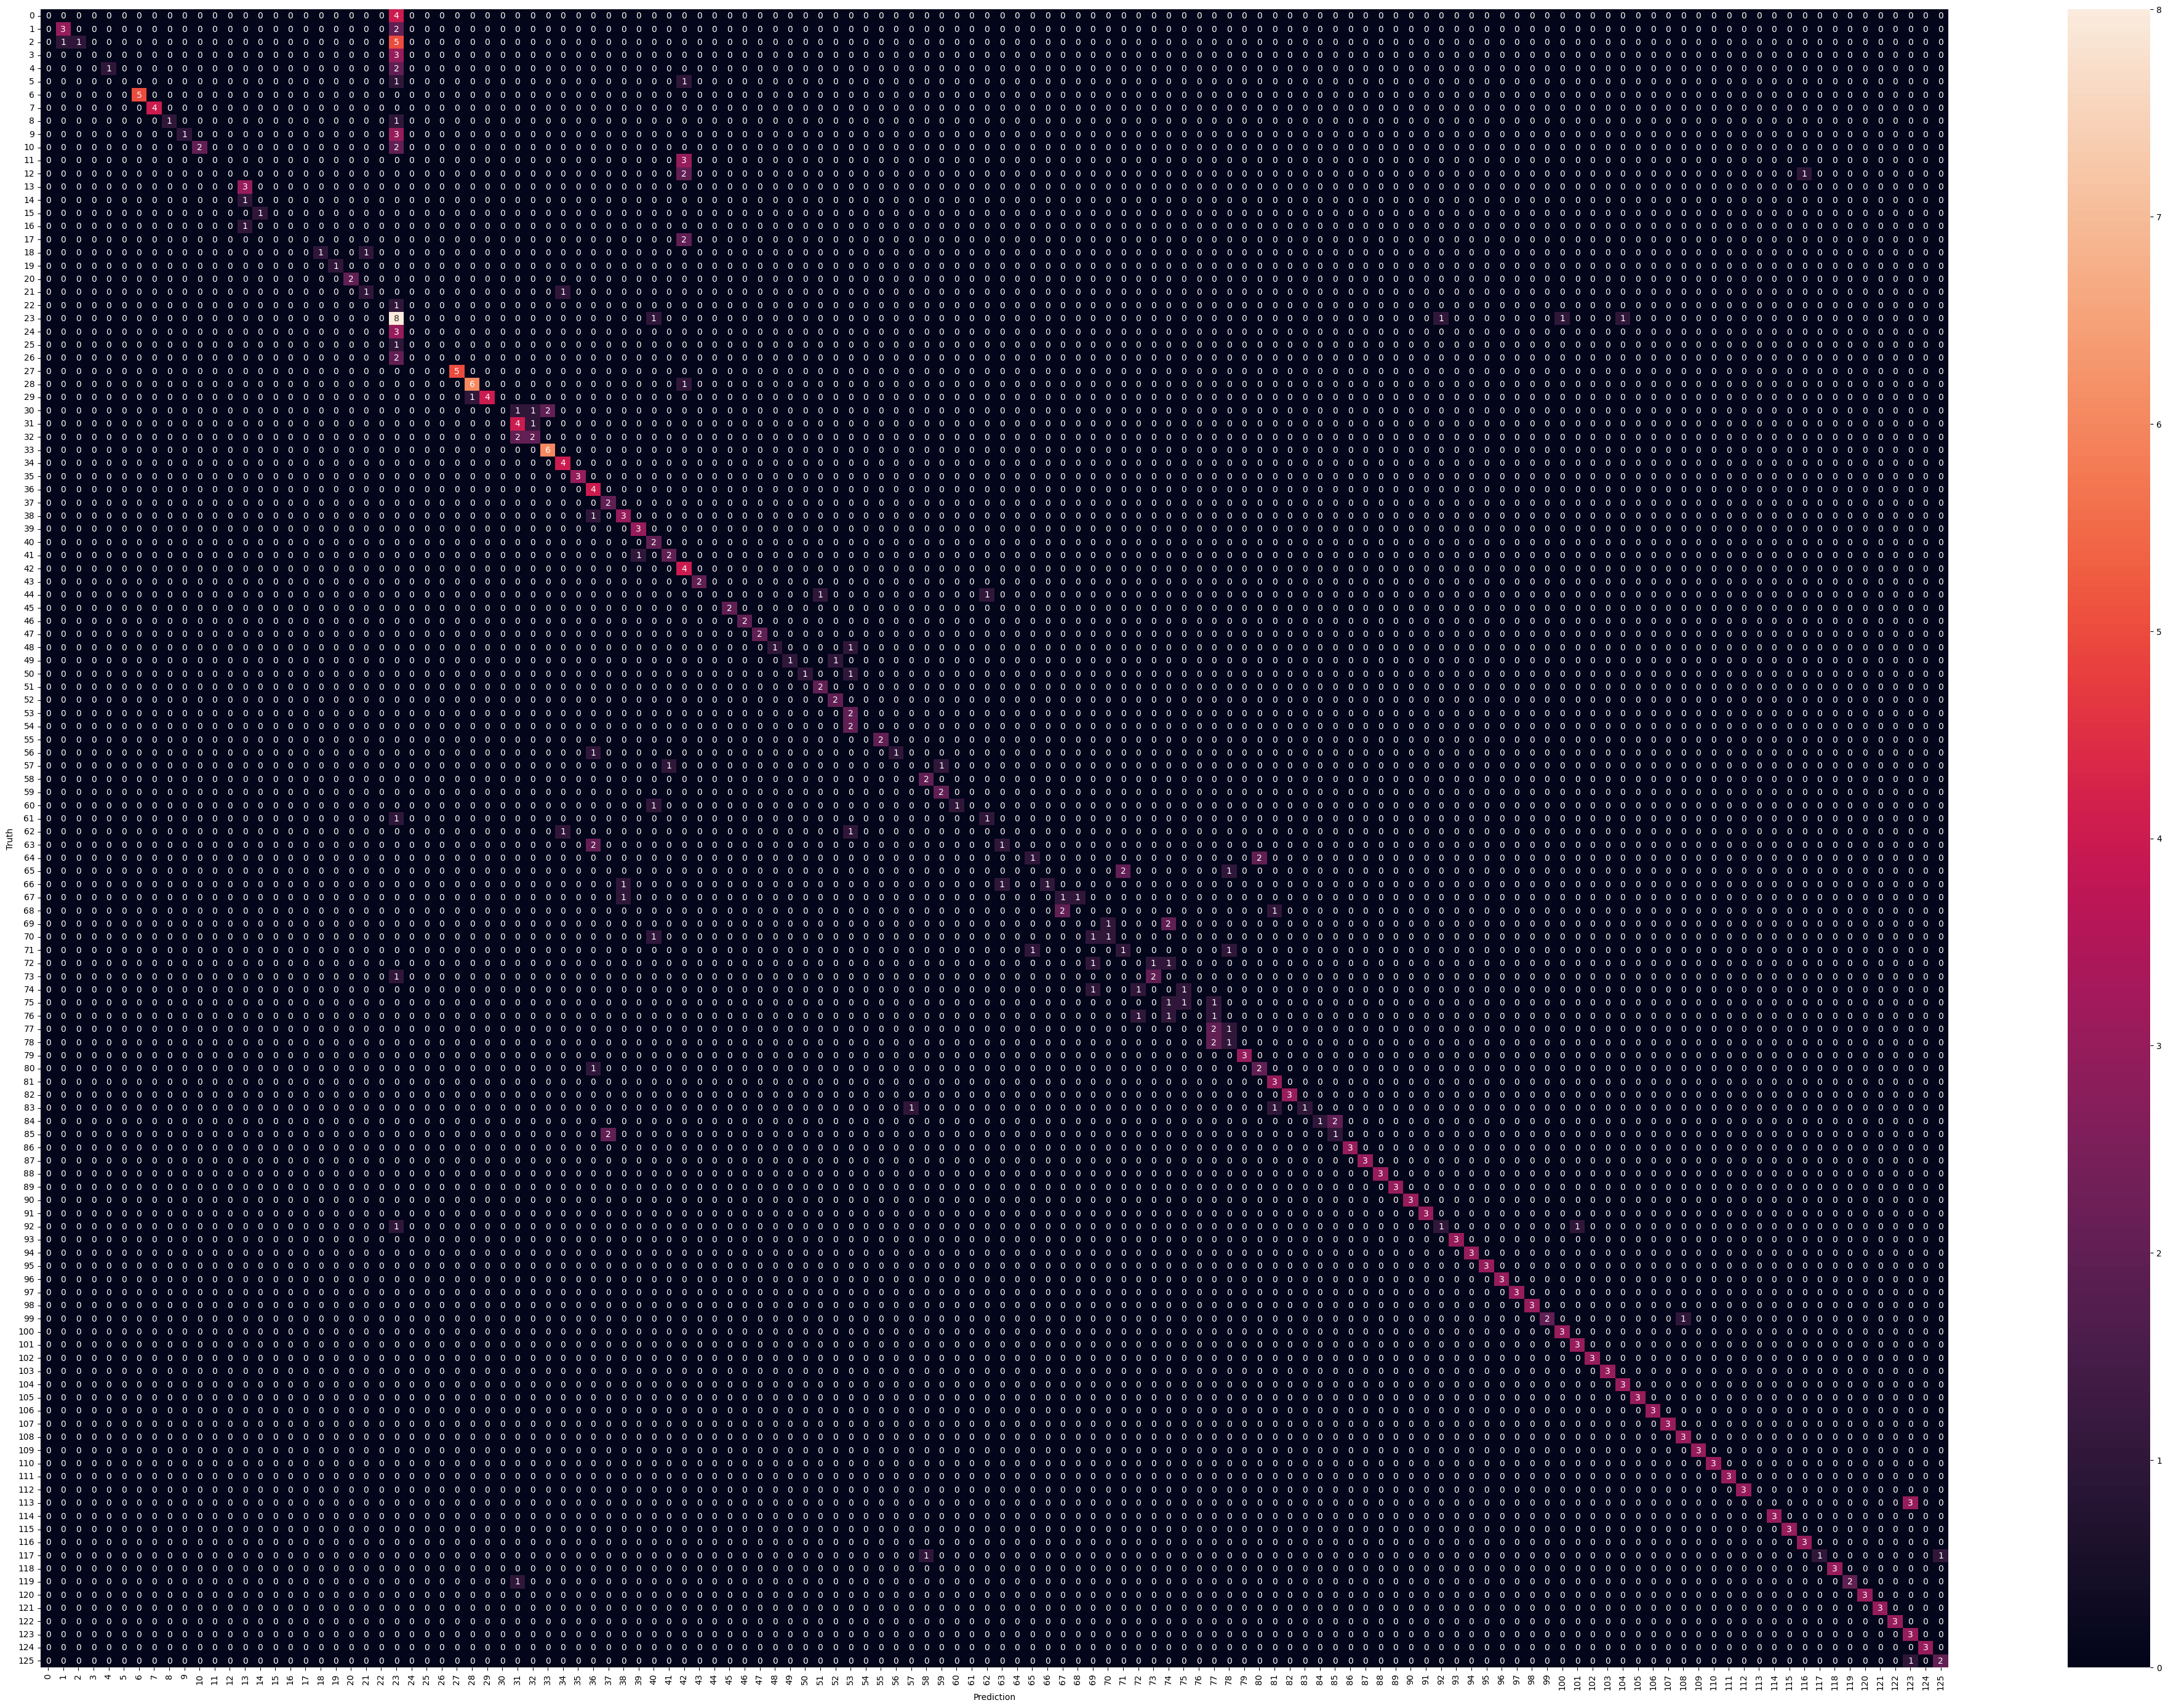

In [74]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (50,35))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Text(595.7222222222223, 0.5, 'Truth')

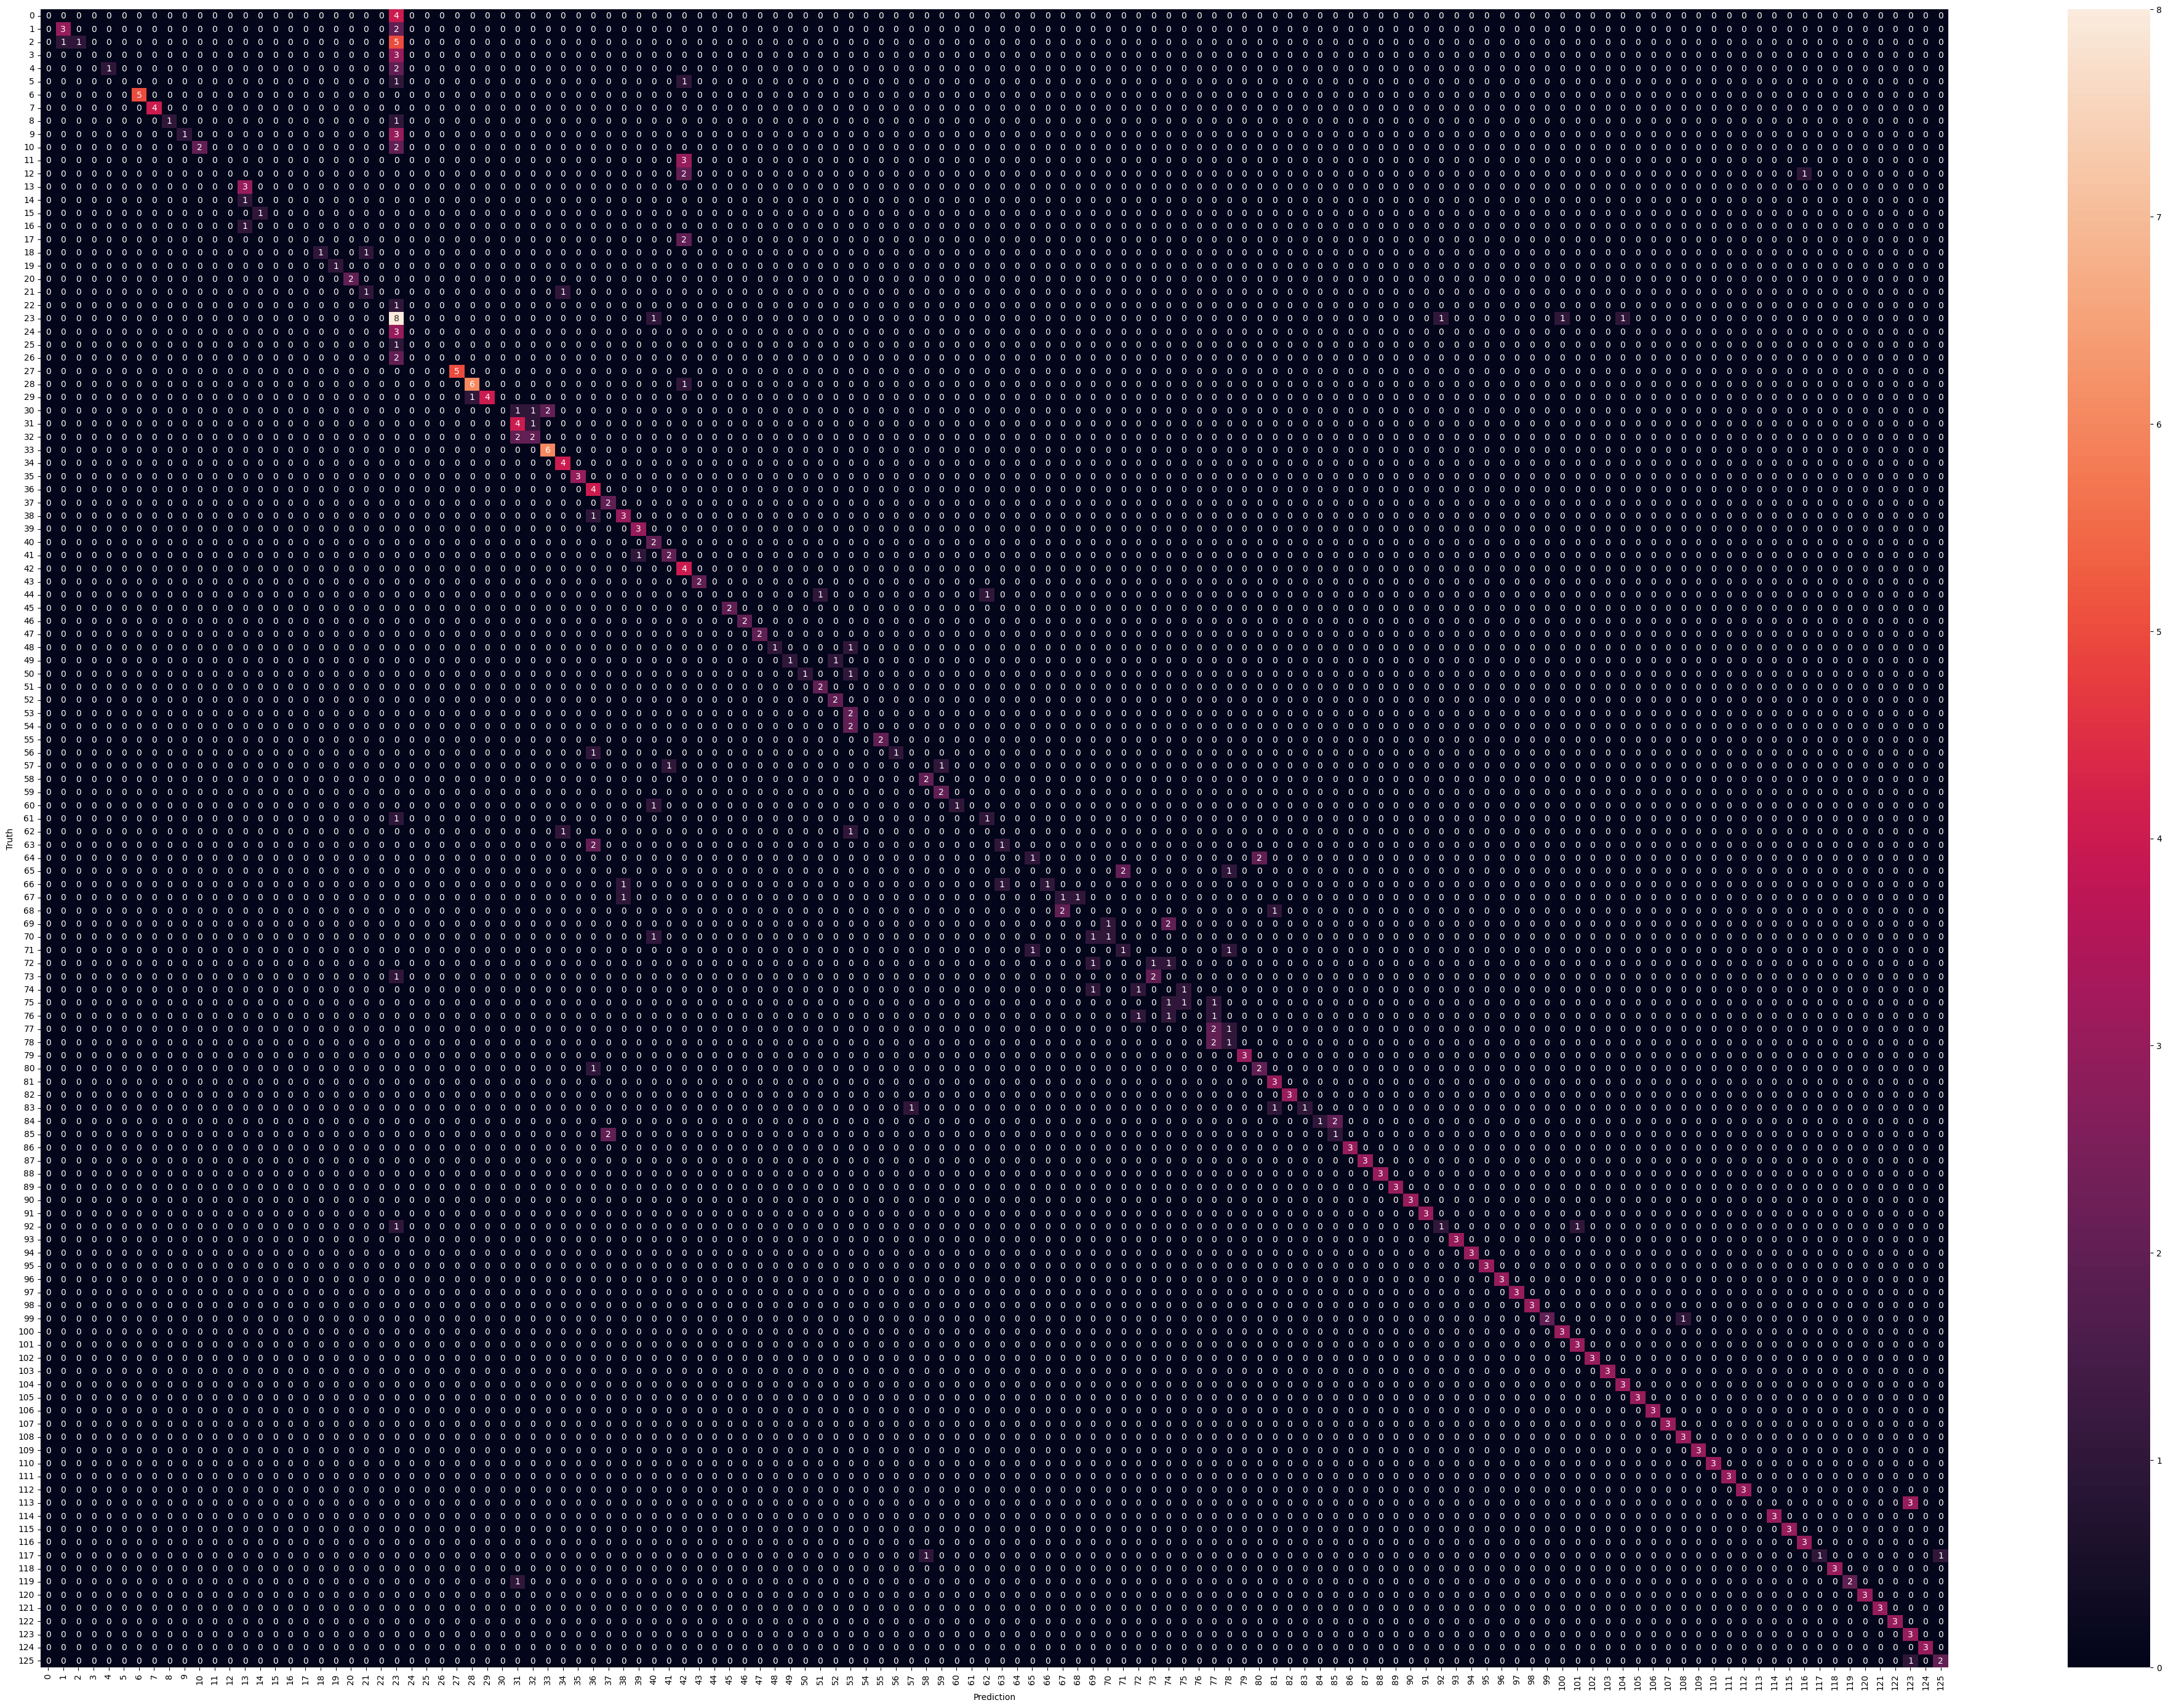

In [ ]:
# with pre processing
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (50,35))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Text(595.7222222222223, 0.5, 'Truth')

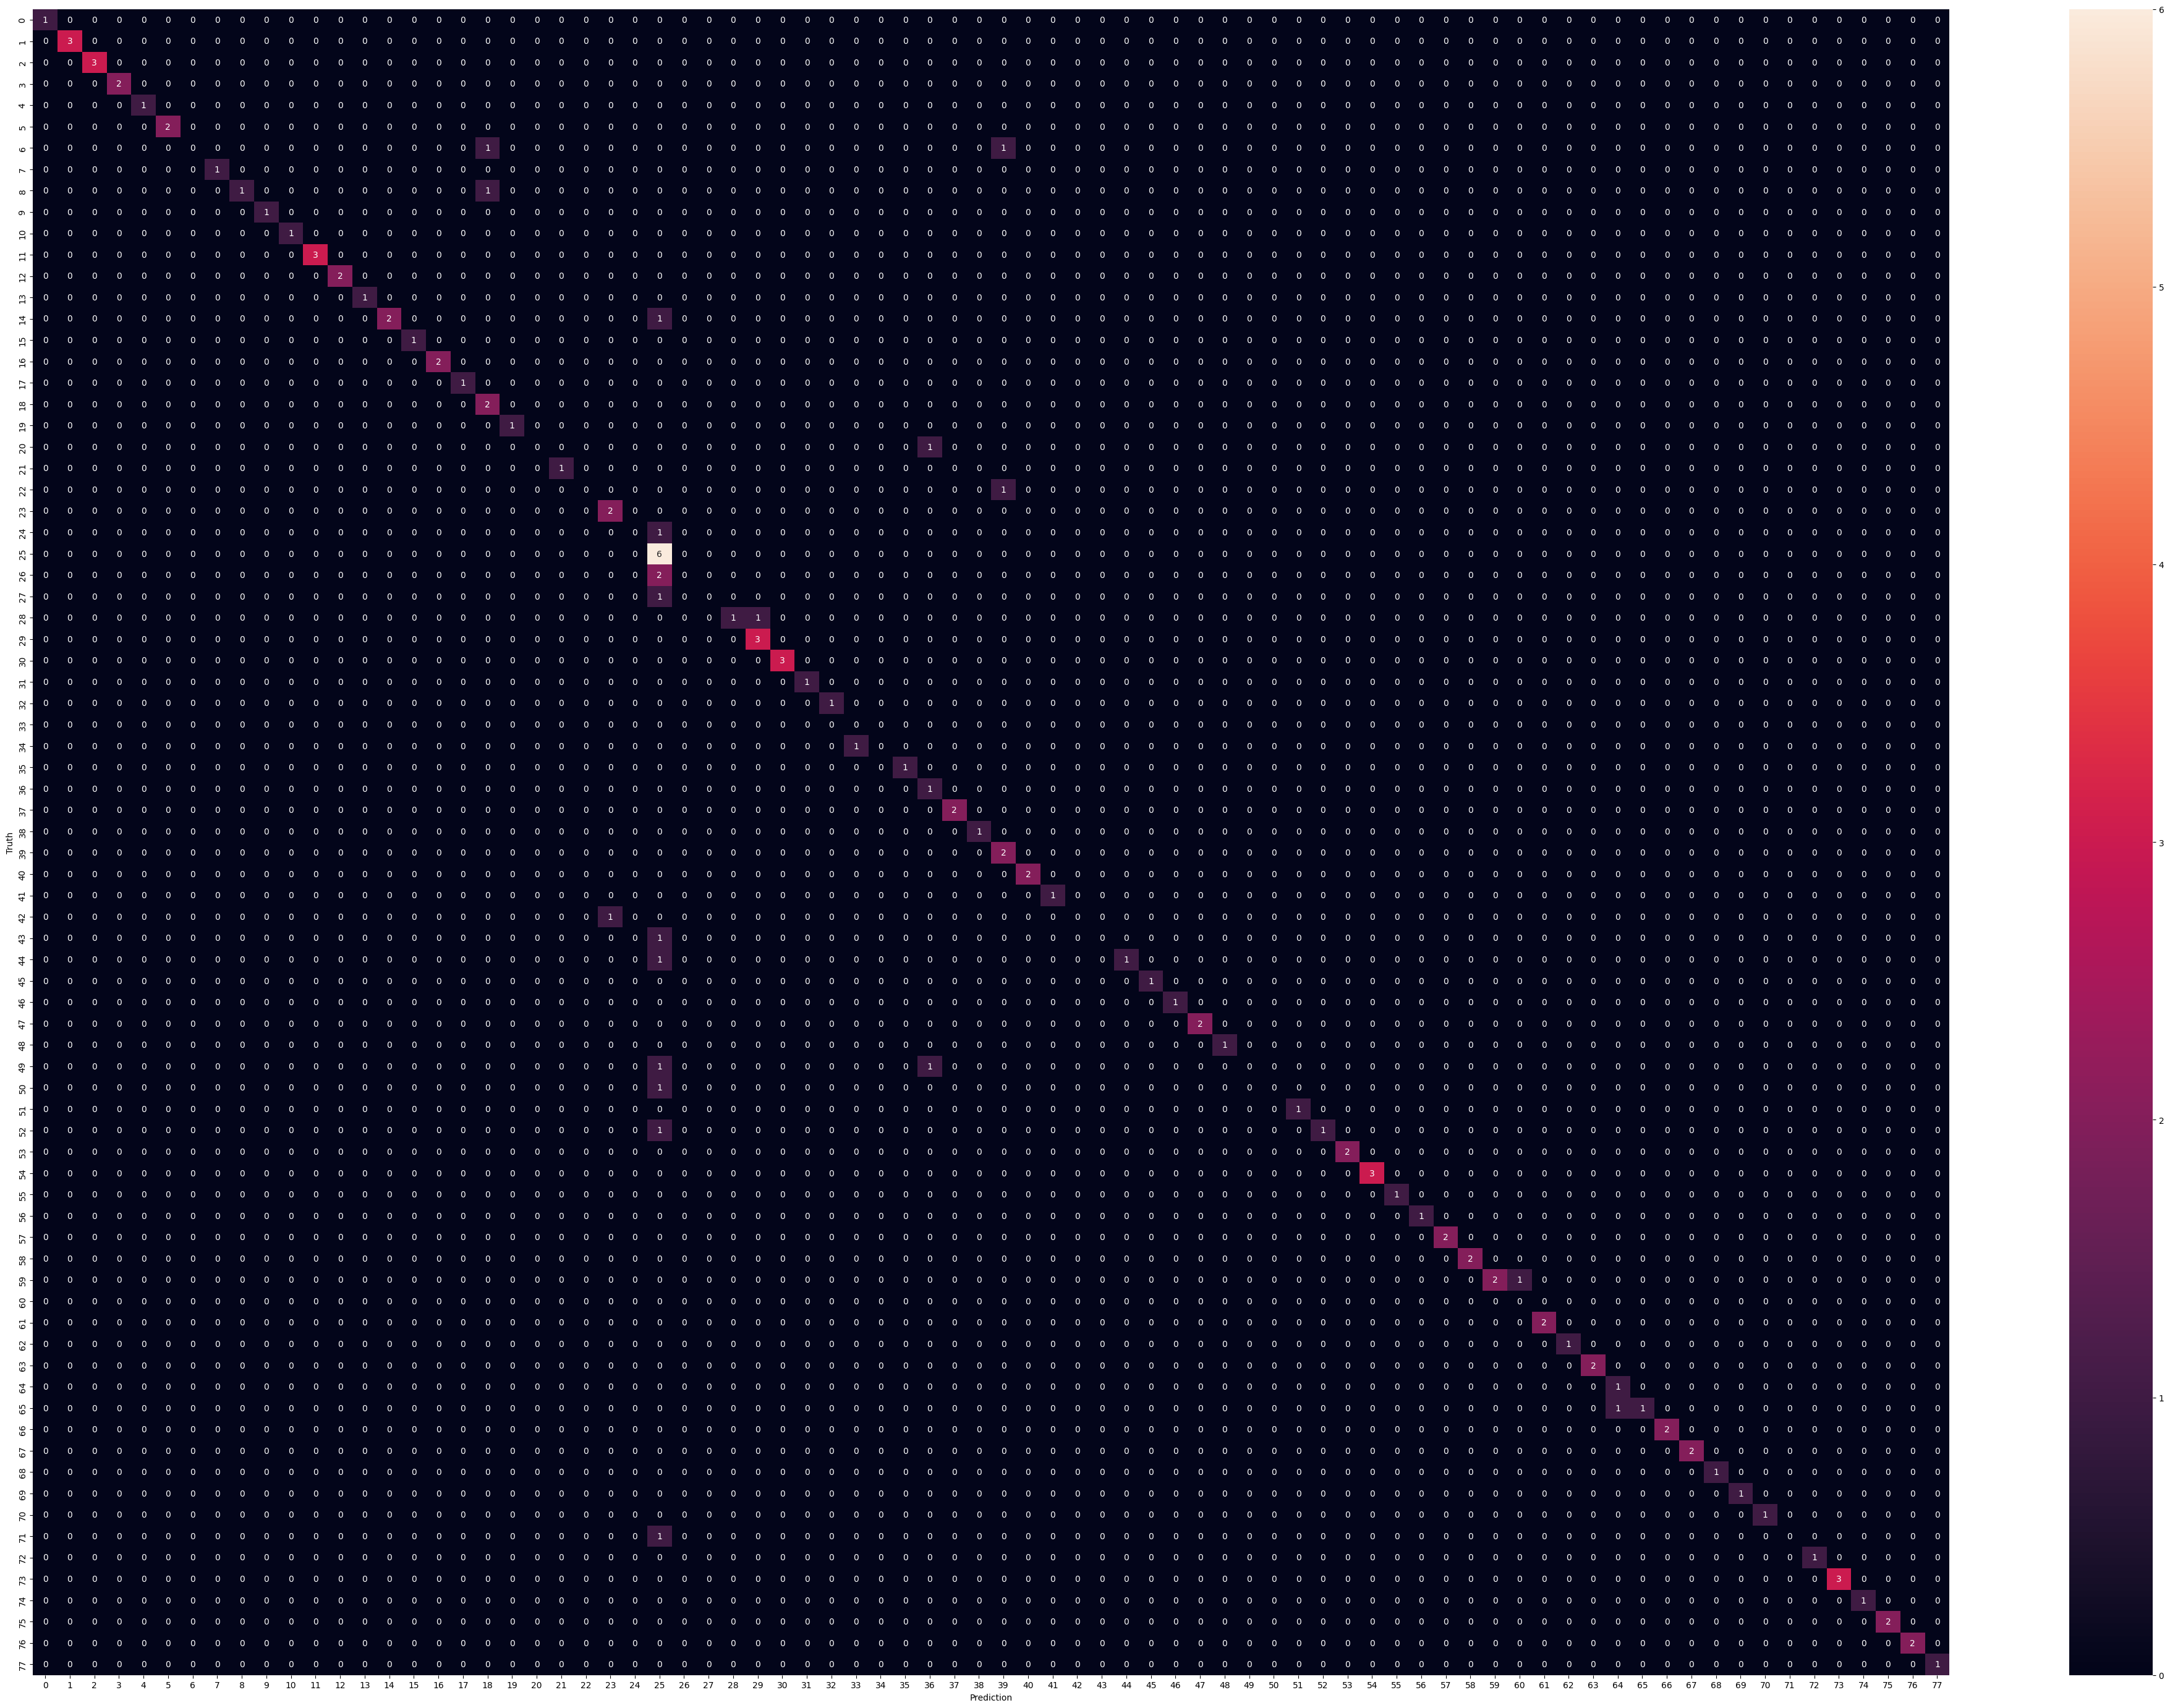

In [168]:
# Without Splitting without pre processing

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (50,35))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Text(595.7222222222223, 0.5, 'Truth')

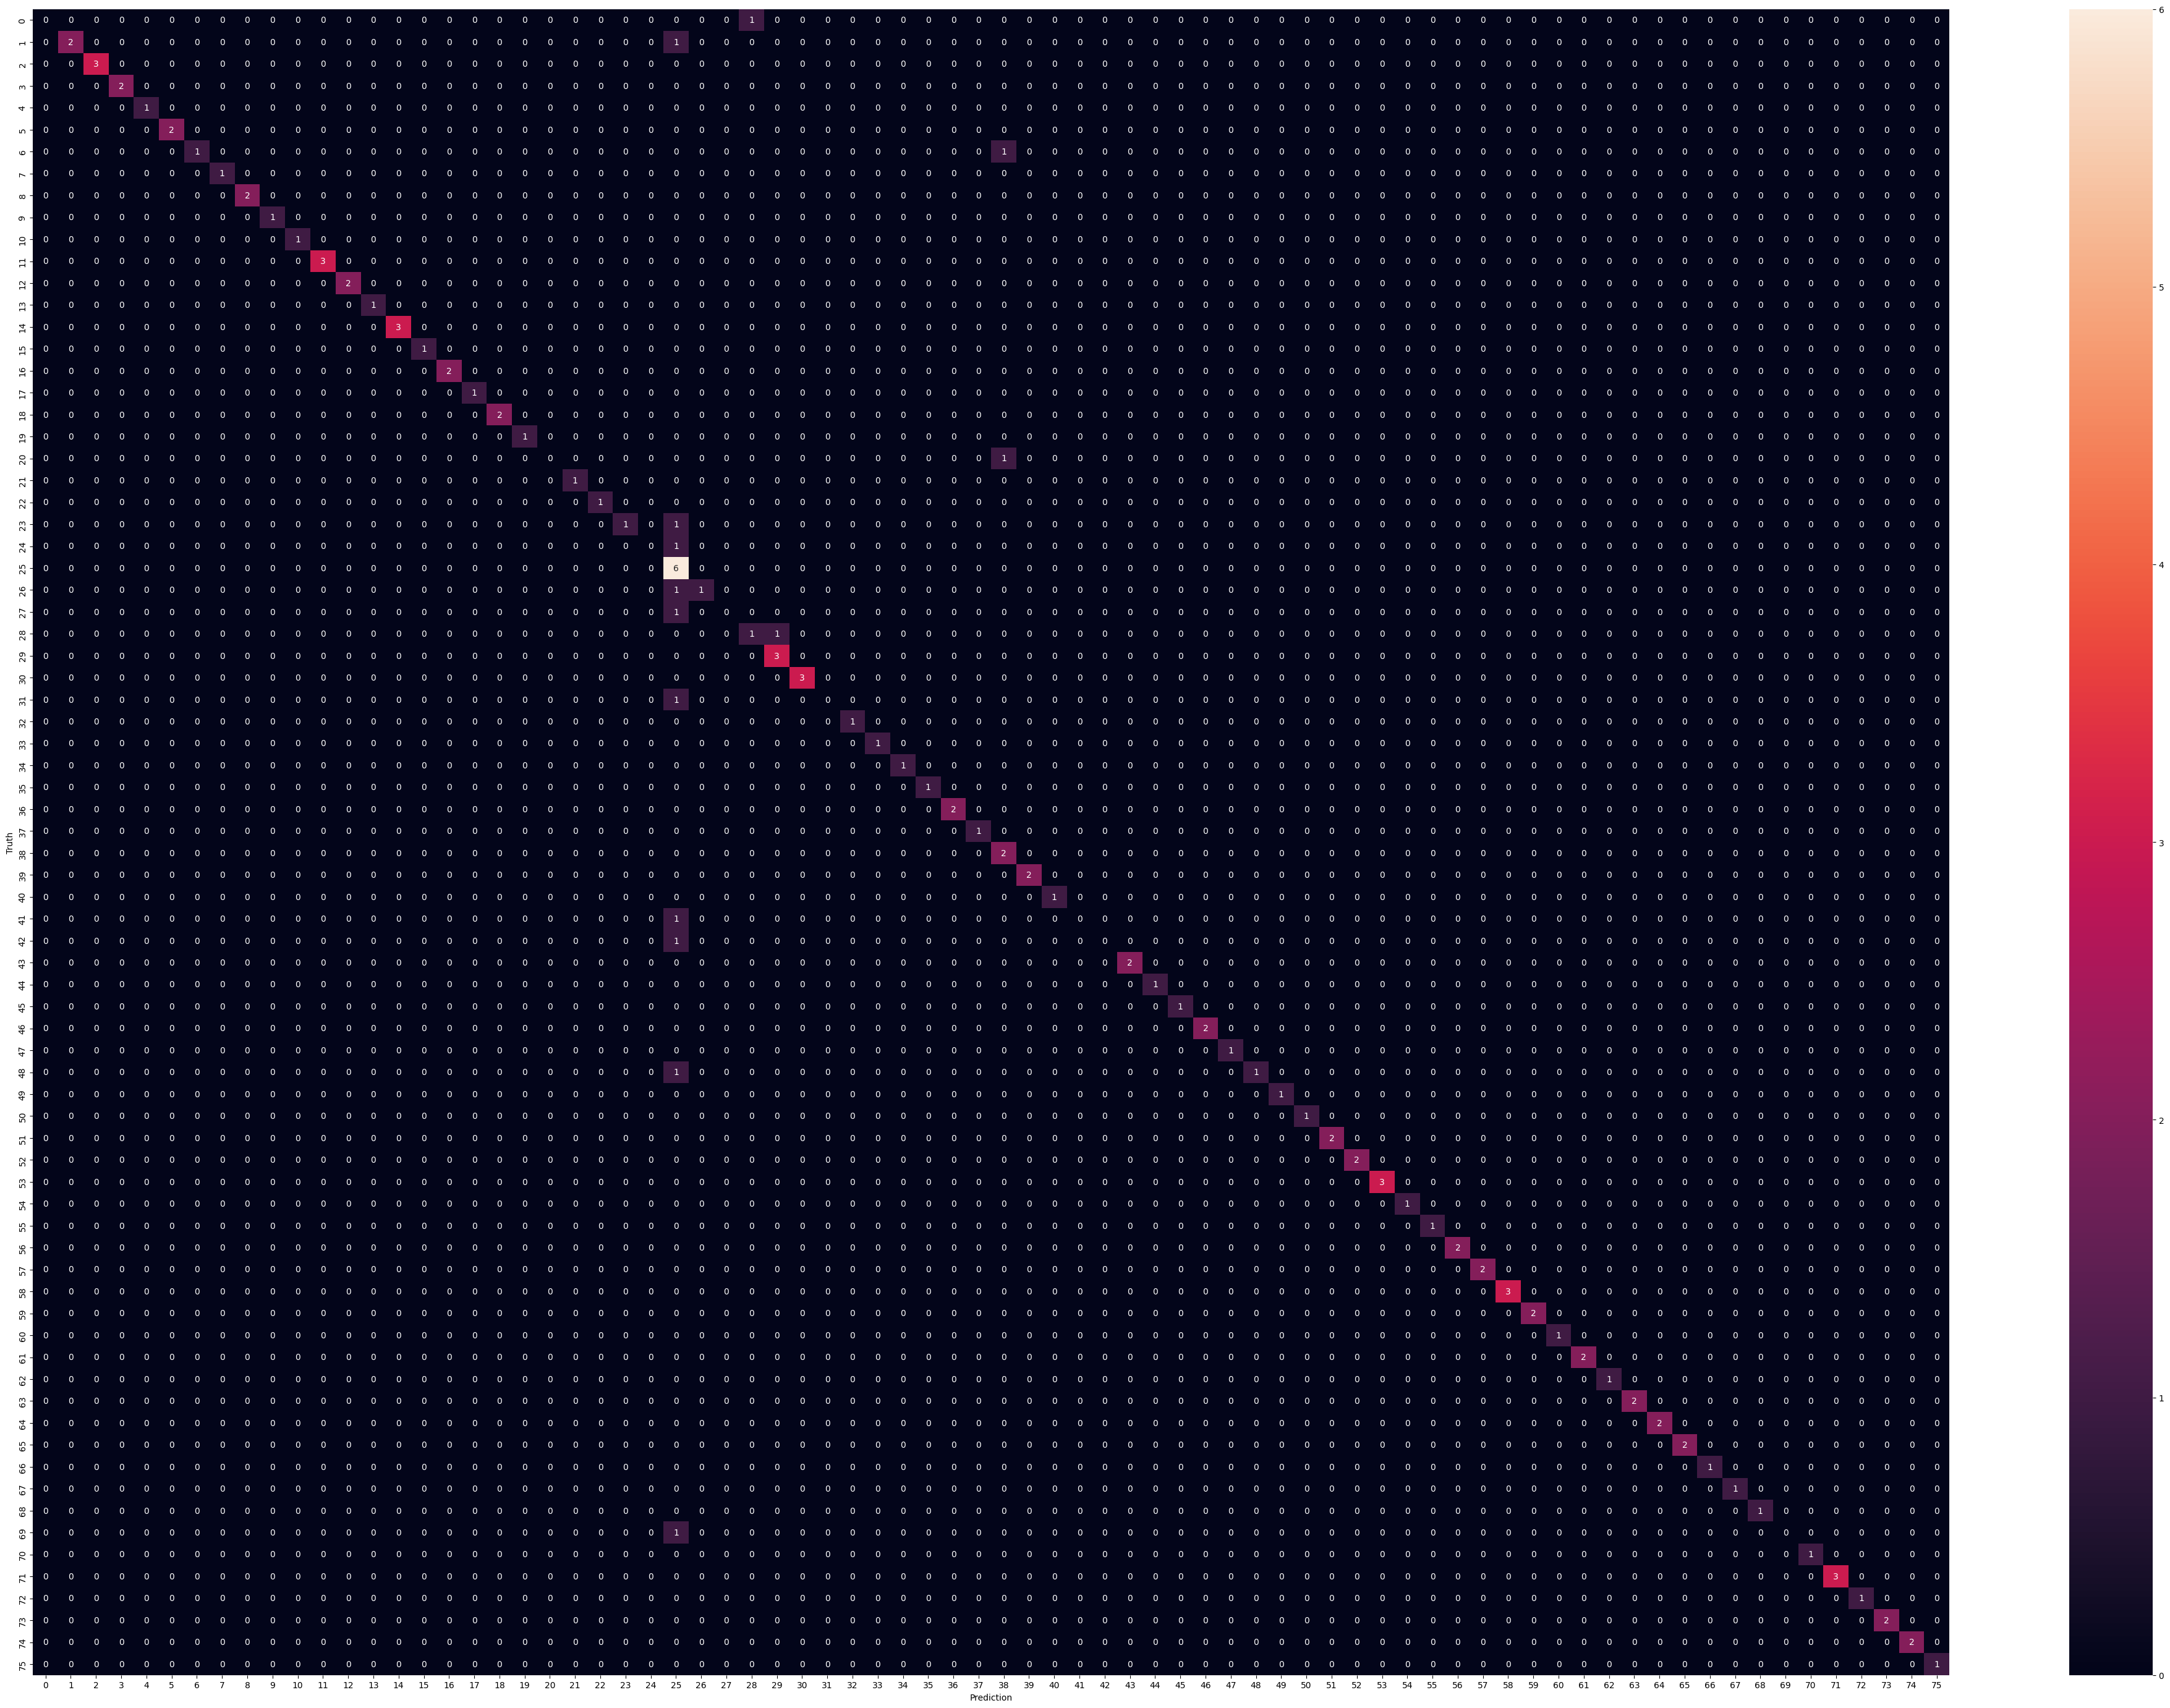

In [184]:
# Without Splitting - with pre-processing

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (50,35))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Text(595.7222222222223, 0.5, 'Truth')

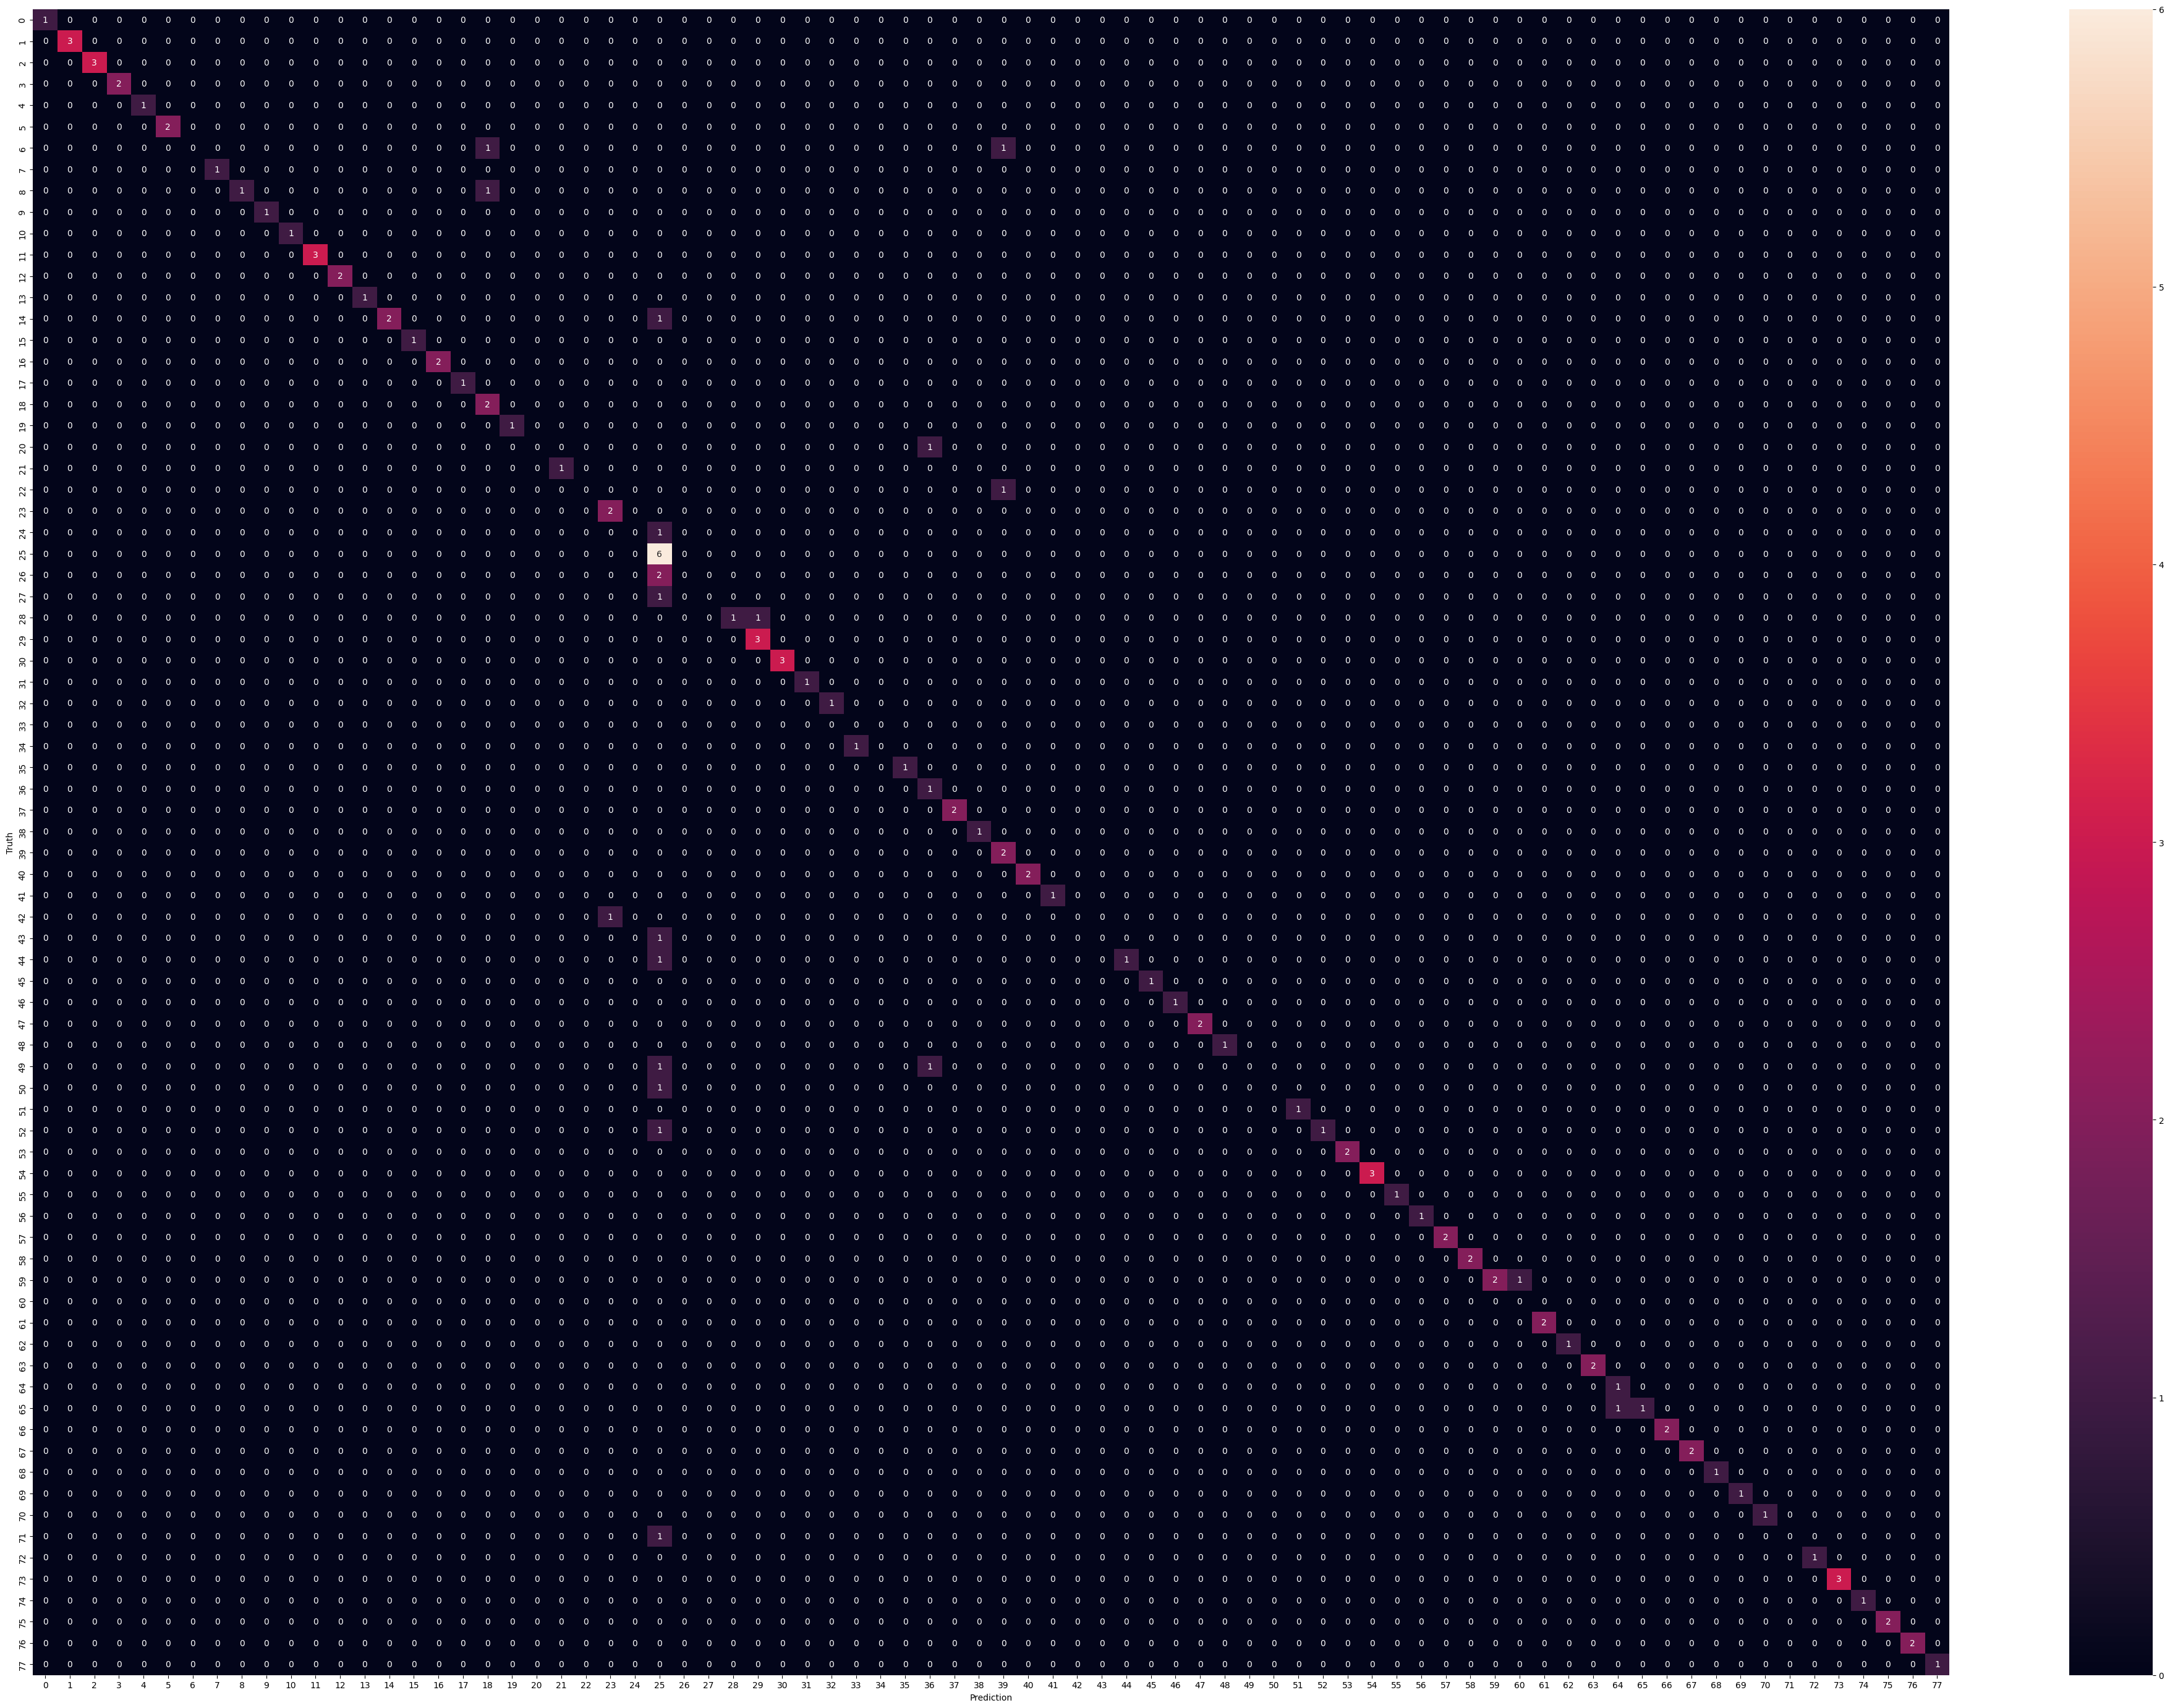

In [20]:
# without splitting - without pre-processing (1,1) n-gram
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (50,35))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Text(595.7222222222223, 0.5, 'Truth')

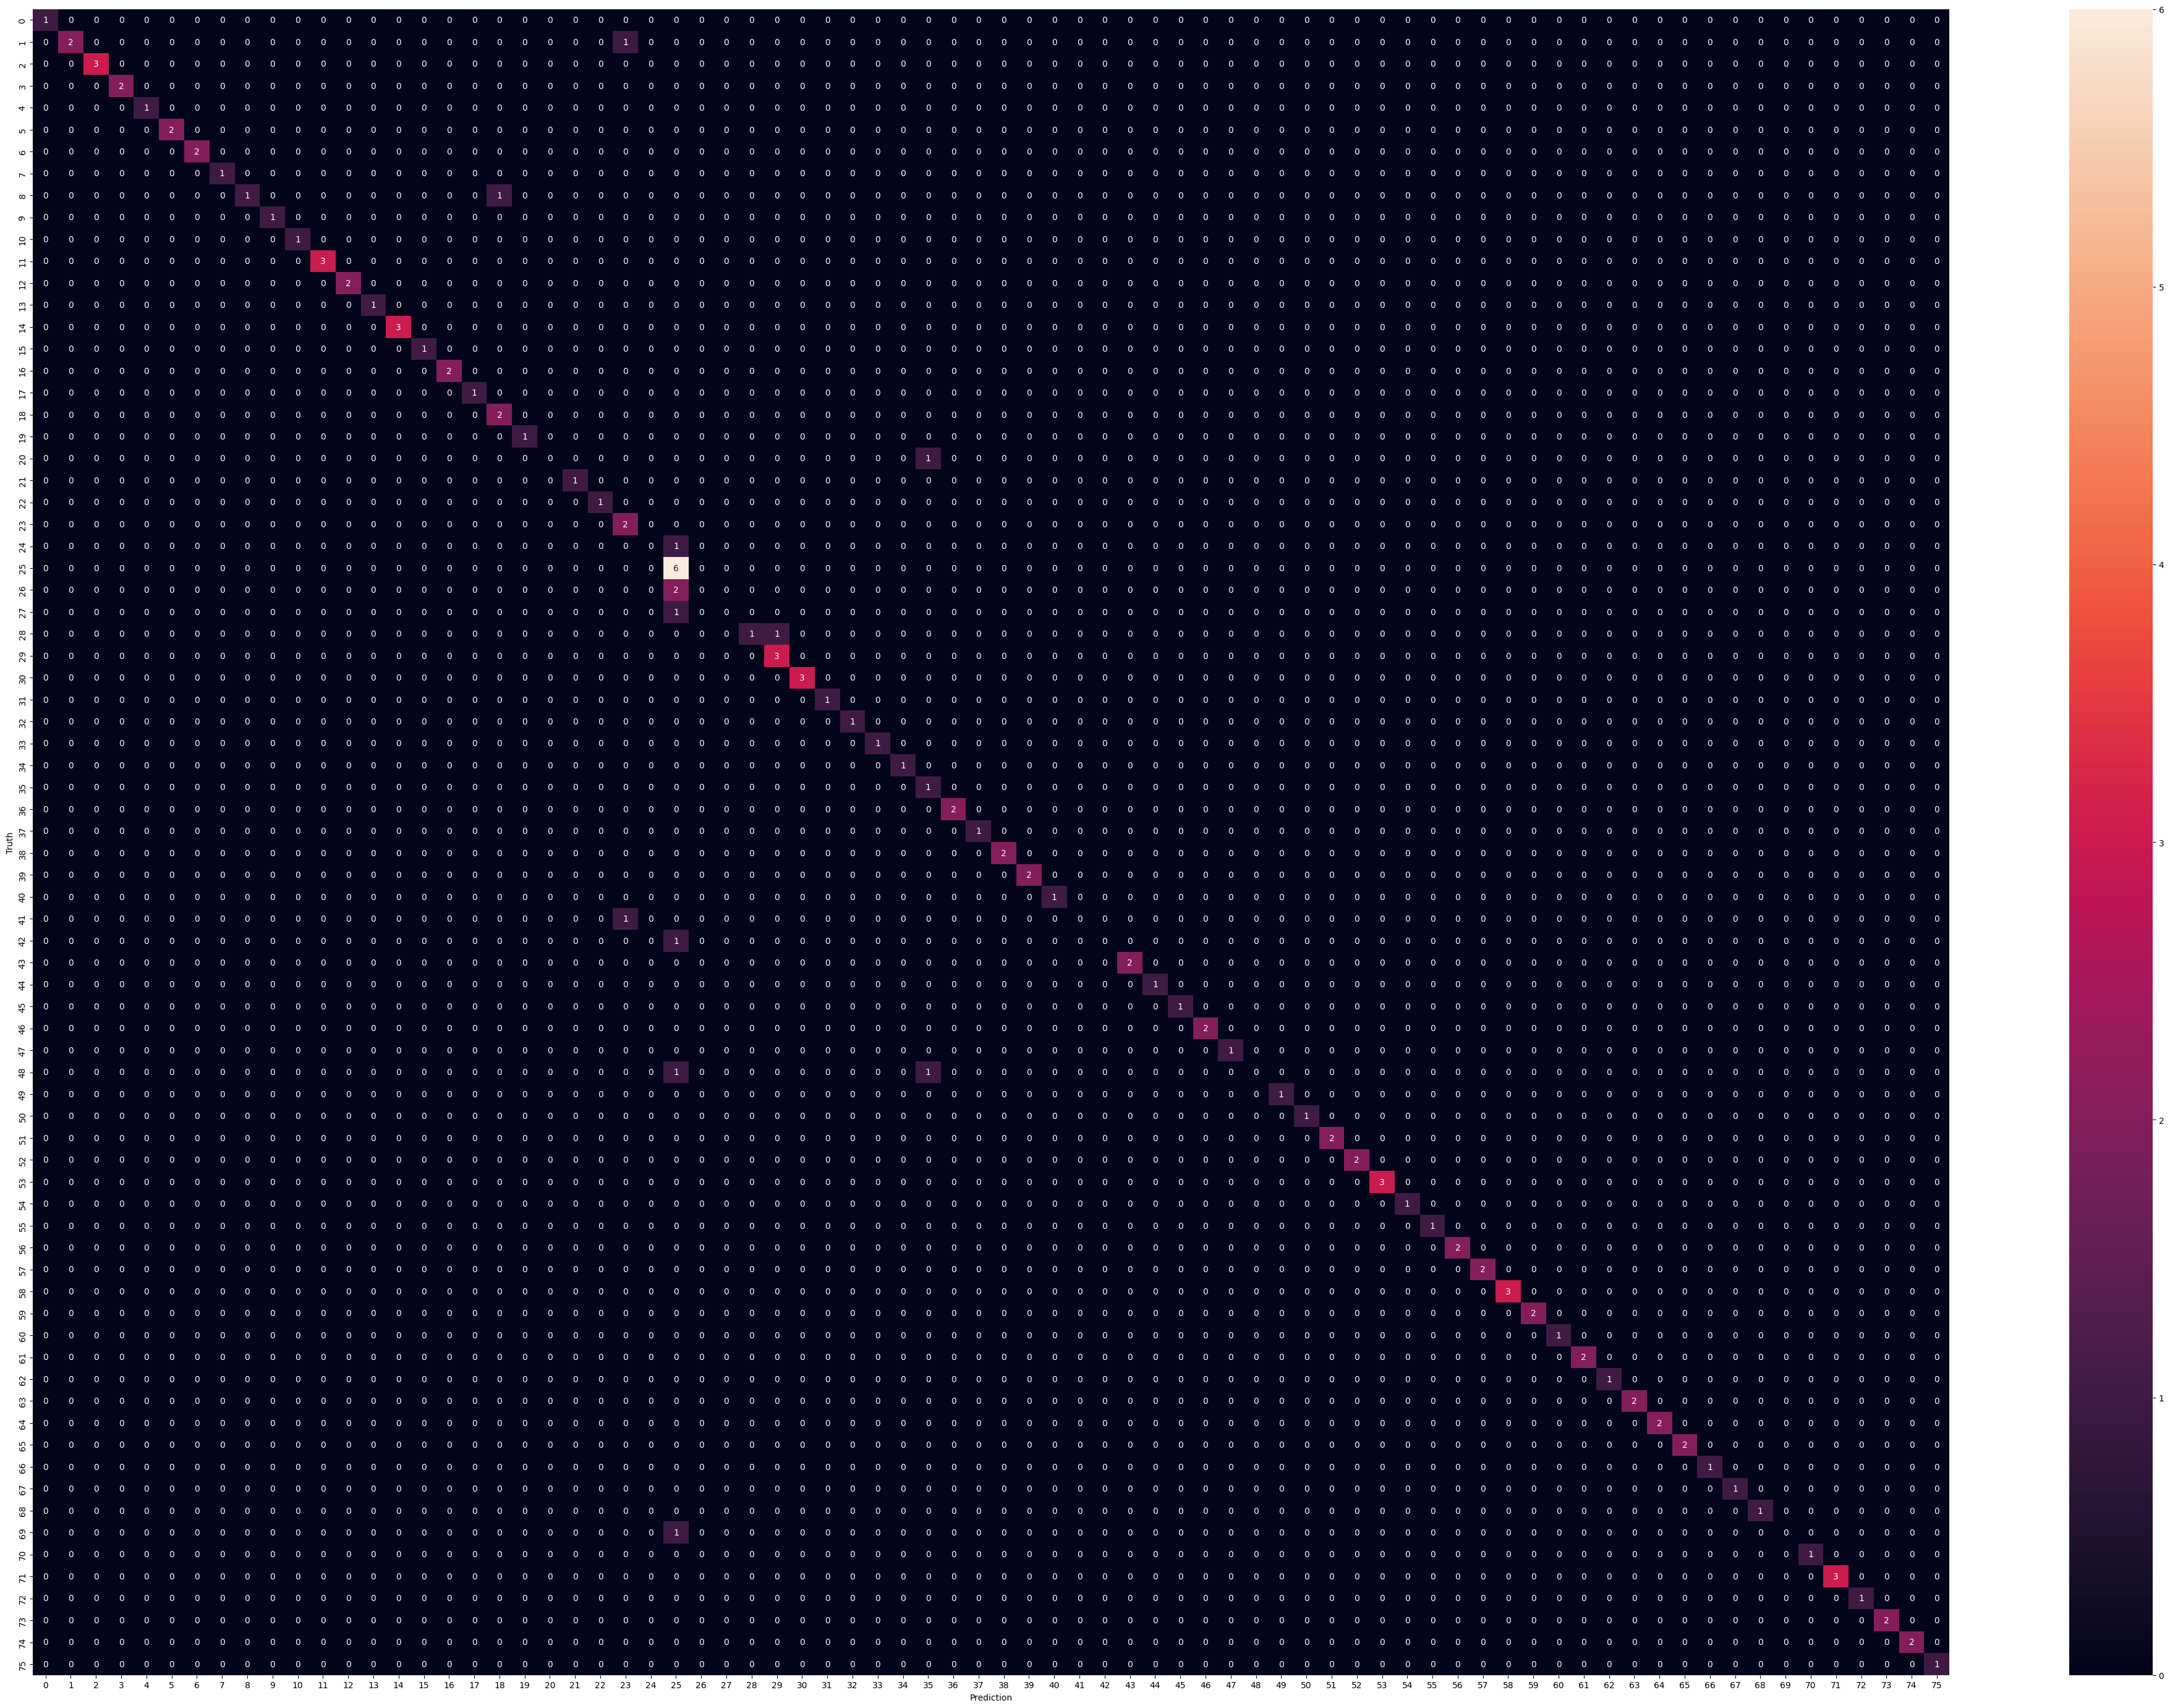

In [24]:
# without splitting - without pre-processing (1,2) n-gram
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (50,35))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')